In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from scipy import misc
import pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import predict_separated_solid as my_predictor_seps
import predict_wsolid as my_predictor_withs
import predict_orig as original_predictor

In [3]:
def get_image(target):
    image = misc.imread('./images/'+target+'.jpg')
    w = image.shape[0]
    h = image.shape[1]
    image = image[12:w-12,12:h-12]
    return image

In [4]:
def get_gt(target):
    gt = misc.imread('./gt/'+target+'.png')
    w = gt.shape[0]
    h = gt.shape[1]
    gt = gt[12:w-12,12:h-12]
    return gt

In [5]:
def get_predictions(target):
    image = get_image(target)
    predict1 = my_predictor_seps.predict(target)
    predict2 = my_predictor_withs.predict(target)
    predict3 = original_predictor.predict(target)    
    gt = get_gt(target)
    return (image,predict1,predict2,predict3,gt)

In [ ]:
def get_predictions(target):
    predictions = pickle.load(open('./extracted/'+target+'/predictions.bin','rb'))
    return predictions

In [85]:
def show_predictions(target):
    predictions = pickle.load(open('./extracted/'+target+'/predictions.bin','rb'))
    fig, axes = plt.subplots(1,5,figsize=(20,20))
    axes[0].imshow(predictions[0])
    axes[0].set_title('original')
    axes[1].imshow(predictions[1],cmap='gray')
    axes[1].set_title('c/b/s classifier')
    axes[2].imshow(predictions[2],cmap='gray')
    axes[2].set_title('c/b+s classifier')
    axes[3].imshow(predictions[3],cmap='gray')
    axes[3].set_title('base classifier')
    axes[4].imshow(predictions[4],cmap='gray')
    axes[4].set_title('ground truth')

Wall time: 297 ms


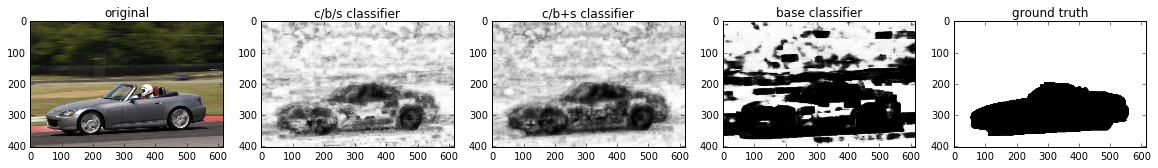

In [86]:
%time show_predictions('motion0014')

In [2]:
import os
dirlist = os.listdir('./extracted')[:1000]

In [33]:
predictions['c/b/s classifier'] = np.array(predictions['c/b/s classifier'])
predictions['c/b+s classifier'] = np.array(predictions['c/b+s classifier'])
predictions['base classifier'] = np.array(predictions['base classifier'])
predictions['ground truth'] = (np.array(predictions['ground truth'])/225).round()

In [34]:
predictions = pickle.load(open('./extracted/predictions.bin','rb'))

In [29]:
roc_auc_score(g,p)

0.84154315204693109

In [1]:
from sklearn.metrics import precision_recall_curve
precision,recall,_ = precision_recall_curve(g,p,pos_label=1)

NameError: name 'g' is not defined

In [ ]:
len(precision)

In [ ]:
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [4]:
predictions = {
    'c/b/s classifier': [],
    'c/b+s classifier': [],
    'base classifier': [],
    'ground truth': []
}
for i,target in enumerate(dirlist):
    prediction = pickle.load(open('./extracted/'+target+'/predictions.bin','rb'))
    predictions['c/b/s classifier'].extend(prediction[1].reshape(1,prediction[1].shape[0]*prediction[1].shape[1]).tolist()[0])
    predictions['c/b+s classifier'].extend(prediction[2].reshape(1,prediction[2].shape[0]*prediction[2].shape[1]).tolist()[0])
    predictions['base classifier'].extend(prediction[3].reshape(1,prediction[4].shape[0]*prediction[3].shape[1]).tolist()[0])
    predictions['ground truth'].extend(prediction[4].reshape(1,prediction[4].shape[0]*prediction[4].shape[1]).tolist()[0])
    print(i,target)

0 motion0001
1 motion0002
2 motion0003
3 motion0004
4 motion0005
5 motion0006
6 motion0007
7 motion0008
8 motion0009
9 motion0010
10 motion0011
11 motion0012
12 motion0013
13 motion0014
14 motion0015
15 motion0016
16 motion0017
17 motion0018
18 motion0019
19 motion0020
20 motion0021
21 motion0022
22 motion0023
23 motion0024
24 motion0025
25 motion0026
26 motion0027
27 motion0028
28 motion0029
29 motion0030
30 motion0031
31 motion0032
32 motion0033
33 motion0034
34 motion0035
35 motion0036
36 motion0037
37 motion0038
38 motion0039
39 motion0040
40 motion0041
41 motion0042
42 motion0043
43 motion0044
44 motion0045
45 motion0046
46 motion0047
47 motion0048
48 motion0049
49 motion0050
50 motion0051
51 motion0052
52 motion0053
53 motion0054
54 motion0055
55 motion0056
56 motion0057
57 motion0058
58 motion0059
59 motion0060
60 motion0061
61 motion0062
62 motion0063
63 motion0064
64 motion0065
65 motion0066
66 motion0067
67 motion0068
68 motion0069
69 motion0070
70 motion0071
71 motion0072
72

In [50]:

for i,target in enumerate(dirlist):
    try:
        predictions = pickle.load(open('./extracted/'+target+'/predictions.bin','rb'))
    except Exception:
        predictions = get_predictions(target)
        pickle.dump(predictions,open('./extracted/'+target+'/predictions.bin','wb'))
        print(i,target)

554 out_of_focus0259
555 out_of_focus0260
556 out_of_focus0261
557 out_of_focus0262
558 out_of_focus0263
559 out_of_focus0264
560 out_of_focus0265
561 out_of_focus0266
562 out_of_focus0267
563 out_of_focus0268
564 out_of_focus0269
565 out_of_focus0270
566 out_of_focus0271
567 out_of_focus0272
568 out_of_focus0273
569 out_of_focus0274
570 out_of_focus0275
571 out_of_focus0276
572 out_of_focus0277
573 out_of_focus0278
574 out_of_focus0279
575 out_of_focus0280
576 out_of_focus0281
577 out_of_focus0282
578 out_of_focus0283
579 out_of_focus0284
580 out_of_focus0285
581 out_of_focus0286
582 out_of_focus0287
